# Intro - Descrição geral

In [260]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [261]:
df = pd.read_csv("melb_data_hw.csv")

In [262]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2.0,h,148000000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3.0,h,0.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  float64
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [264]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,9.631104e+05,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,1.634117e+06,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,0.000000e+00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,5.350000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,8.270000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.260000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,1.480000e+08,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [265]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [266]:
print(df.columns.values)

['Suburb' 'Address' 'Rooms' 'Type' 'Price' 'Method' 'SellerG' 'Date'
 'Distance' 'Postcode' 'Bedroom2' 'Bathroom' 'Car' 'Landsize'
 'BuildingArea' 'YearBuilt' 'CouncilArea' 'Lattitude' 'Longtitude'
 'Regionname' 'Propertycount']


C:\Users\asus\AppData\Local\Temp\ipykernel_14116\1393987990.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Landsize'}>],
       [<AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>],
       [<AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

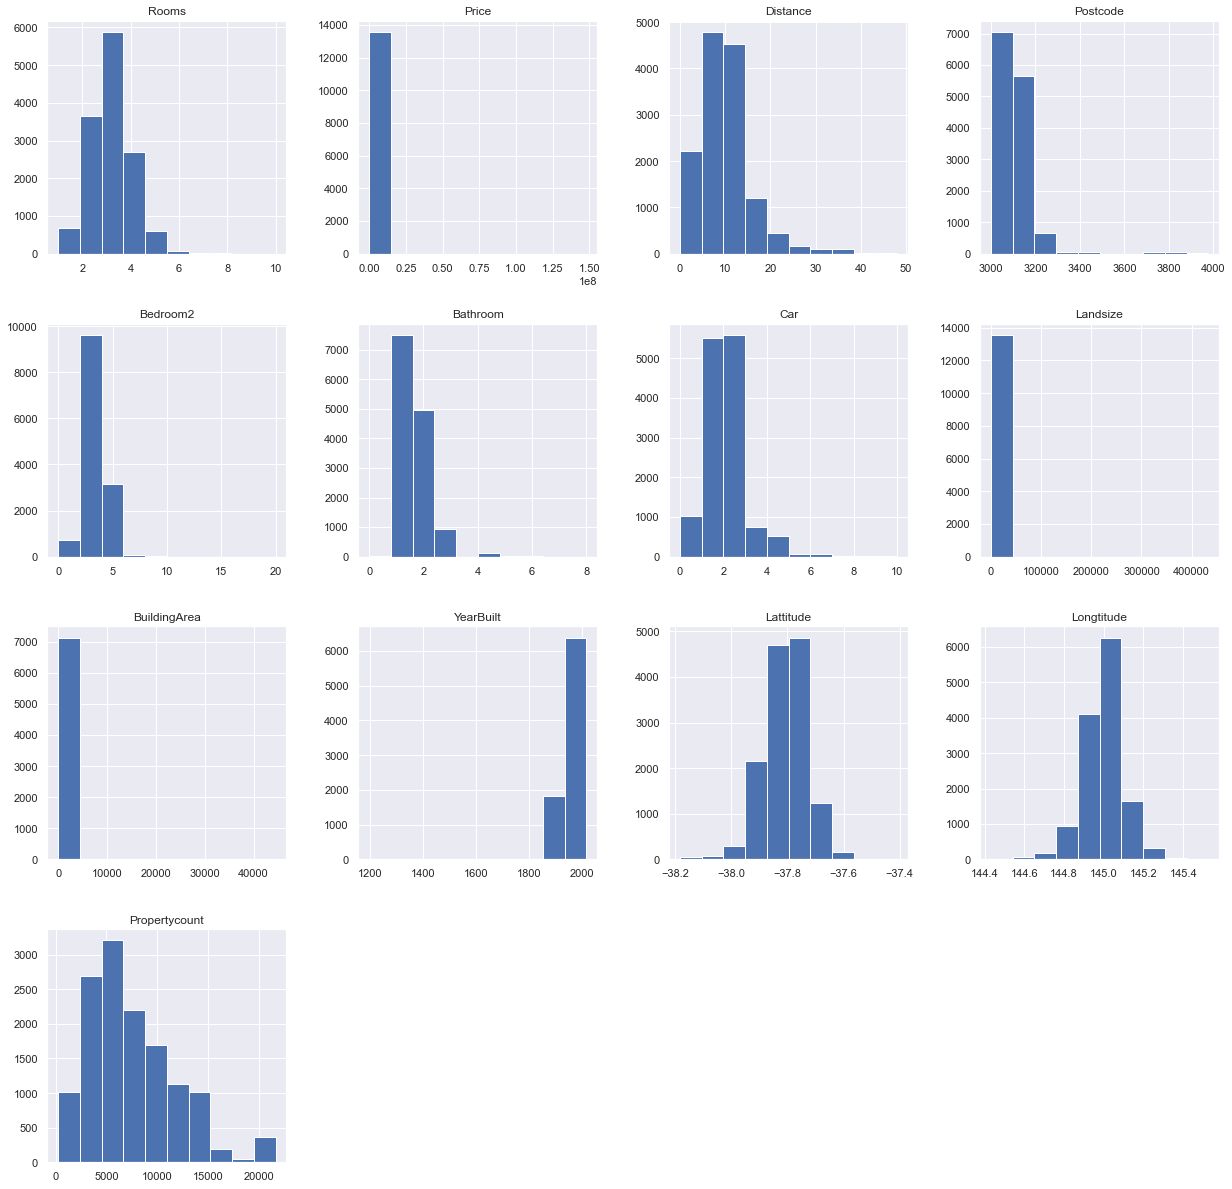

In [267]:
#Visualizar multiplas colunas e a sua distribuição



fig = plt.figure(figsize = (21,21))
ax = fig.gca()
df.hist(ax = ax)

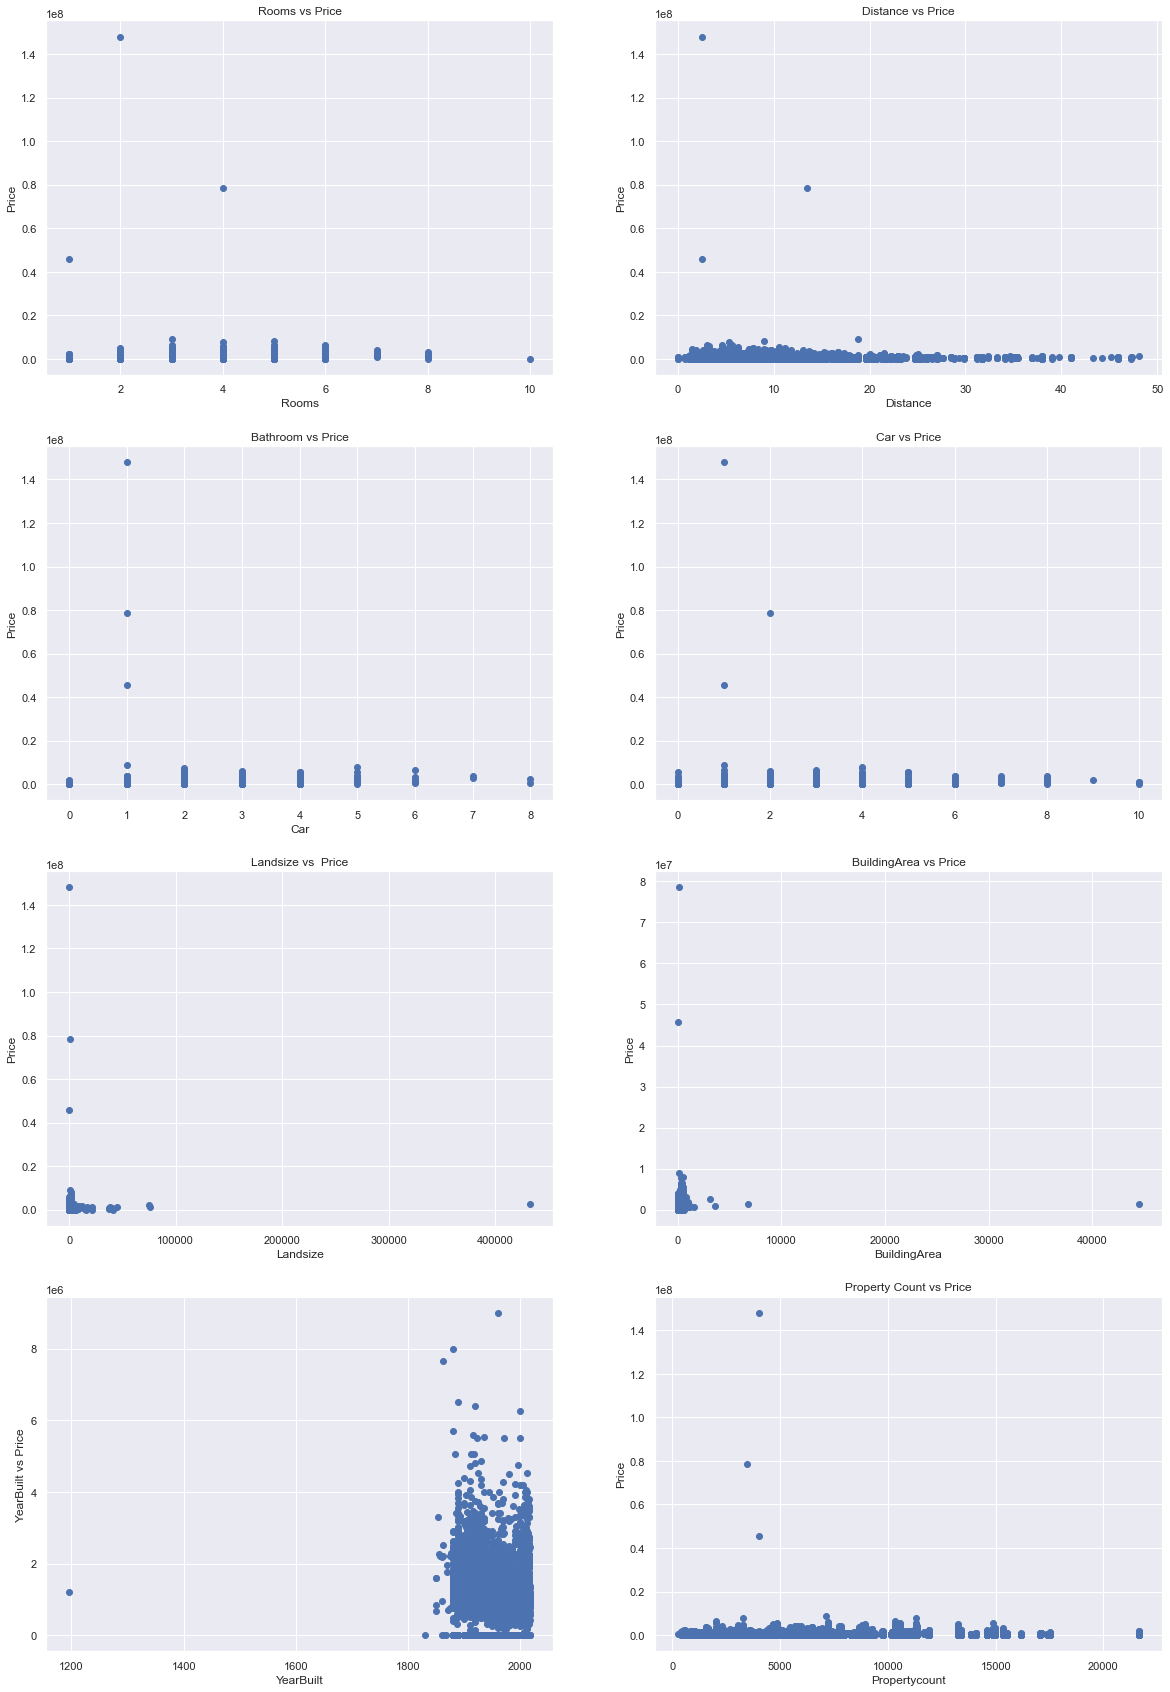

In [268]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms vs Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance vs Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom vs Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car vs Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize vs  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('BuildingArea vs Price')

# Plot [3,0]
axes[3,0].scatter(x = 'YearBuilt', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('YearBuilt')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('YearBuilt vs Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count vs Price')

plt.show()

# Tratar Outliers

In [269]:
#Eliminar Outlier em "BuildingArea"

In [270]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='BuildingArea'>

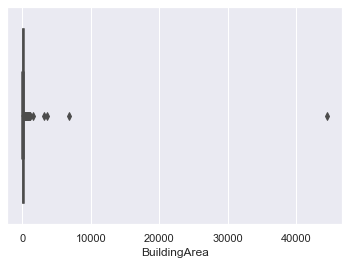

In [271]:
ax1 = fig.add_subplot()
sns.boxplot(x=df["BuildingArea"])

In [272]:
print ("Avg of BuildingArea: ",df['BuildingArea'].mean())
print ("Median BuildingArea: ",df['BuildingArea'].median())

Avg of BuildingArea:  151.96764988779805
Median BuildingArea:  126.0


In [273]:
print("Highest allowed",df['BuildingArea'].mean() + 3*df['BuildingArea'].std())

Highest allowed 1775.0112627668518


In [274]:
df = df[(df['BuildingArea'] < 1776) & (df['BuildingArea'] > 0)]

<AxesSubplot:xlabel='BuildingArea'>

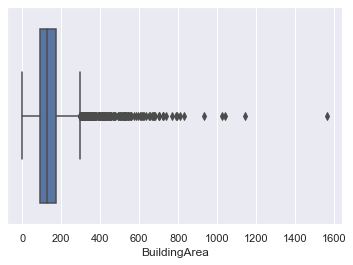

In [275]:
ax1 = fig.add_subplot()
sns.boxplot(x=df["BuildingArea"])

In [276]:
#Eliminar Outlier "YearBuilt"

<AxesSubplot:xlabel='YearBuilt'>

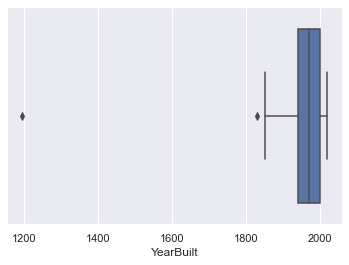

In [277]:
ax1 = fig.add_subplot()
sns.boxplot(x=df["YearBuilt"])

In [278]:
print ("Avg of YearBuilt: ",df['YearBuilt'].mean())
print ("Median YearBuilt: ",df['YearBuilt'].median())

Avg of YearBuilt:  1964.1891812865497
Median YearBuilt:  1970.0


In [279]:
print("Lowest allowed",df['YearBuilt'].mean() - 3*df['YearBuilt'].std())

Lowest allowed 1850.5665622974257


In [280]:
df = df[df['YearBuilt'] > 1850]

<AxesSubplot:xlabel='YearBuilt'>

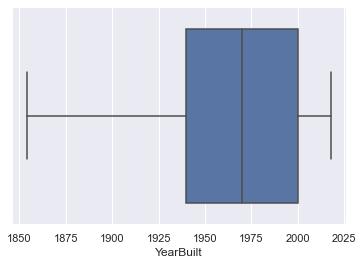

In [281]:
ax1 = fig.add_subplot()
sns.boxplot(x=df["YearBuilt"])

# Tratar Nulls

In [282]:
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df) * 100

CouncilArea      9.451353
Car              0.409656
Suburb           0.000000
Bathroom         0.000000
Regionname       0.000000
Longtitude       0.000000
Lattitude        0.000000
YearBuilt        0.000000
BuildingArea     0.000000
Landsize         0.000000
Bedroom2         0.000000
Address          0.000000
Postcode         0.000000
Distance         0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Price            0.000000
Type             0.000000
Rooms            0.000000
Propertycount    0.000000
dtype: float64

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6835 entries, 1 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6835 non-null   object 
 1   Address        6835 non-null   object 
 2   Rooms          6835 non-null   float64
 3   Type           6835 non-null   object 
 4   Price          6835 non-null   float64
 5   Method         6835 non-null   object 
 6   SellerG        6835 non-null   object 
 7   Date           6835 non-null   object 
 8   Distance       6835 non-null   float64
 9   Postcode       6835 non-null   float64
 10  Bedroom2       6835 non-null   float64
 11  Bathroom       6835 non-null   float64
 12  Car            6807 non-null   float64
 13  Landsize       6835 non-null   float64
 14  BuildingArea   6835 non-null   float64
 15  YearBuilt      6835 non-null   float64
 16  CouncilArea    6189 non-null   object 
 17  Lattitude      6835 non-null   float64
 18  Longtit

In [284]:
df.dropna(inplace=True)

In [285]:
df.drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3.0,h,0.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3.0,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2.0,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3.0,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3.0,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1.0,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2.0,u,0.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [286]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [287]:
df = df.dropna()

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6189 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6189 non-null   object 
 1   Address        6189 non-null   object 
 2   Rooms          6189 non-null   float64
 3   Type           6189 non-null   object 
 4   Price          6189 non-null   float64
 5   Method         6189 non-null   object 
 6   SellerG        6189 non-null   object 
 7   Date           6189 non-null   object 
 8   Distance       6189 non-null   float64
 9   Postcode       6189 non-null   float64
 10  Bedroom2       6189 non-null   float64
 11  Bathroom       6189 non-null   float64
 12  Car            6189 non-null   float64
 13  Landsize       6189 non-null   float64
 14  BuildingArea   6189 non-null   float64
 15  YearBuilt      6189 non-null   float64
 16  CouncilArea    6189 non-null   object 
 17  Lattitude      6189 non-null   float64
 18  Longtit

In [289]:
df = df[df['Price'] > 0]

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5417 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5417 non-null   object 
 1   Address        5417 non-null   object 
 2   Rooms          5417 non-null   float64
 3   Type           5417 non-null   object 
 4   Price          5417 non-null   float64
 5   Method         5417 non-null   object 
 6   SellerG        5417 non-null   object 
 7   Date           5417 non-null   object 
 8   Distance       5417 non-null   float64
 9   Postcode       5417 non-null   float64
 10  Bedroom2       5417 non-null   float64
 11  Bathroom       5417 non-null   float64
 12  Car            5417 non-null   float64
 13  Landsize       5417 non-null   float64
 14  BuildingArea   5417 non-null   float64
 15  YearBuilt      5417 non-null   float64
 16  CouncilArea    5417 non-null   object 
 17  Lattitude      5417 non-null   float64
 18  Longtit

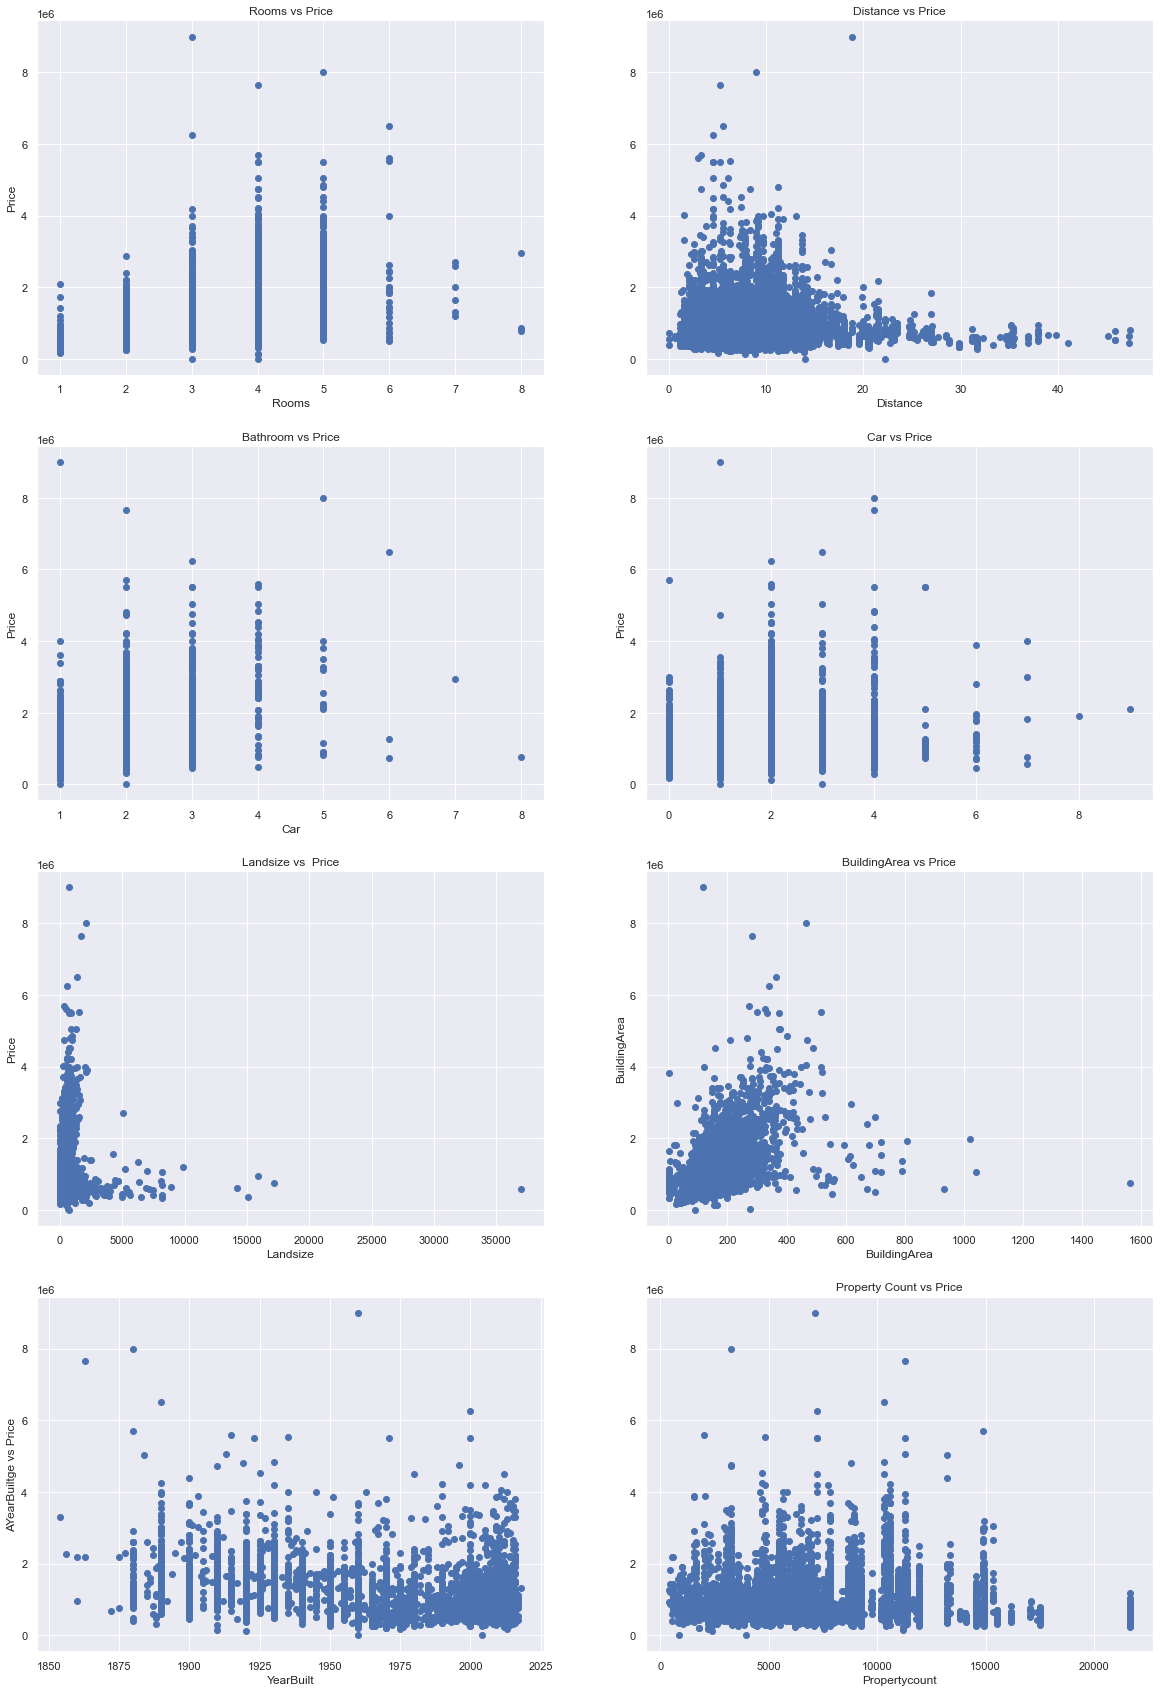

In [291]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms vs Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance vs Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom vs Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car vs Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize vs  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea vs Price')

# Plot [3,0]
axes[3,0].scatter(x = 'YearBuilt', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('YearBuilt')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('AYearBuiltge vs Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count vs Price')

plt.show()

In [292]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Correlações; Dummies; Visualização 

<AxesSubplot:>

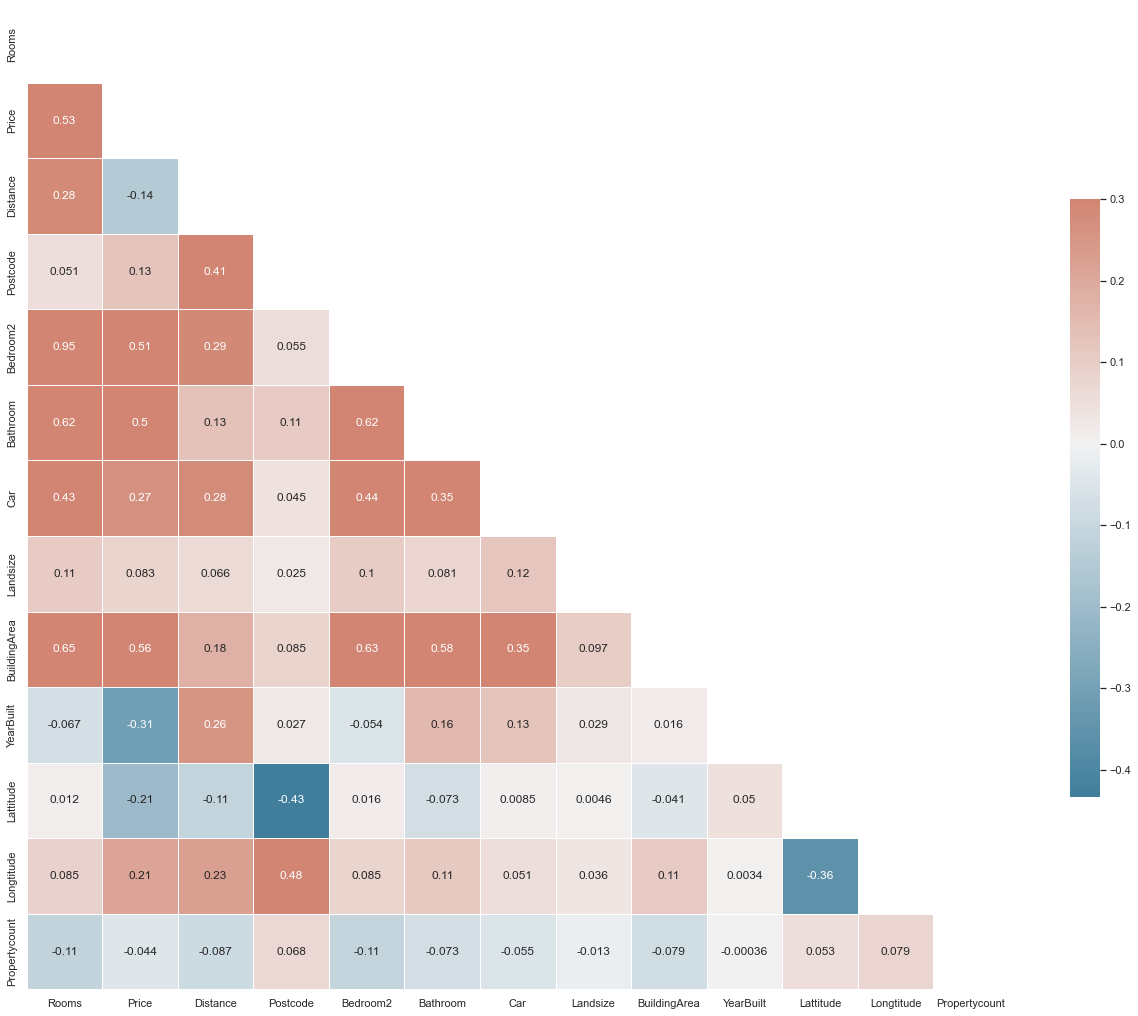

In [293]:
#observar a correlação 

sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5417 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5417 non-null   object 
 1   Address        5417 non-null   object 
 2   Rooms          5417 non-null   float64
 3   Type           5417 non-null   object 
 4   Price          5417 non-null   float64
 5   Method         5417 non-null   object 
 6   SellerG        5417 non-null   object 
 7   Date           5417 non-null   object 
 8   Distance       5417 non-null   float64
 9   Postcode       5417 non-null   float64
 10  Bedroom2       5417 non-null   float64
 11  Bathroom       5417 non-null   float64
 12  Car            5417 non-null   float64
 13  Landsize       5417 non-null   float64
 14  BuildingArea   5417 non-null   float64
 15  YearBuilt      5417 non-null   float64
 16  CouncilArea    5417 non-null   object 
 17  Lattitude      5417 non-null   float64
 18  Longtit

In [295]:
df.drop(['Address', 'Date', 'Postcode', 'Propertycount'], axis=1, inplace=True)

In [296]:
#tornar dummie as colunas columns=["Regionname","SellerG",'Type','Suburb']
df = pd.get_dummies(df, columns=['Suburb',"Regionname",'Type','Method',"CouncilArea",'SellerG'], prefix=['Suburb',"Regionname",'Type','Method',"CouncilArea",'SellerG'])

In [297]:
corr = df.corr()

In [298]:
#ter listagem do nome de todas as colunas
a = []
for column in df:
    a.append(str(column))
print(a)

['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Suburb_Abbotsford', 'Suburb_Aberfeldie', 'Suburb_Airport West', 'Suburb_Albanvale', 'Suburb_Albert Park', 'Suburb_Albion', 'Suburb_Alphington', 'Suburb_Altona', 'Suburb_Altona Meadows', 'Suburb_Altona North', 'Suburb_Ardeer', 'Suburb_Armadale', 'Suburb_Ascot Vale', 'Suburb_Ashburton', 'Suburb_Ashwood', 'Suburb_Aspendale', 'Suburb_Avondale Heights', 'Suburb_Balaclava', 'Suburb_Balwyn', 'Suburb_Balwyn North', 'Suburb_Bayswater', 'Suburb_Bayswater North', 'Suburb_Beaconsfield', 'Suburb_Beaconsfield Upper', 'Suburb_Beaumaris', 'Suburb_Bellfield', 'Suburb_Bentleigh', 'Suburb_Bentleigh East', 'Suburb_Berwick', 'Suburb_Black Rock', 'Suburb_Blackburn', 'Suburb_Blackburn North', 'Suburb_Blackburn South', 'Suburb_Boronia', 'Suburb_Box Hill', 'Suburb_Braybrook', 'Suburb_Briar Hill', 'Suburb_Brighton', 'Suburb_Brighton East', 'Suburb_Broadmeadows', 'Suburb_Brookfield',

In [299]:
listaCorr_21 = []

for column in a:
    
    if corr['Price'][column] >= 0.2 or corr['Price'][column] <= -0.2:
        listaCorr_21.append(column)

print(listaCorr_21)


['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname_Southern Metropolitan', 'Type_h', 'Type_u', 'CouncilArea_Boroondara', 'SellerG_Marshall']


<AxesSubplot:>

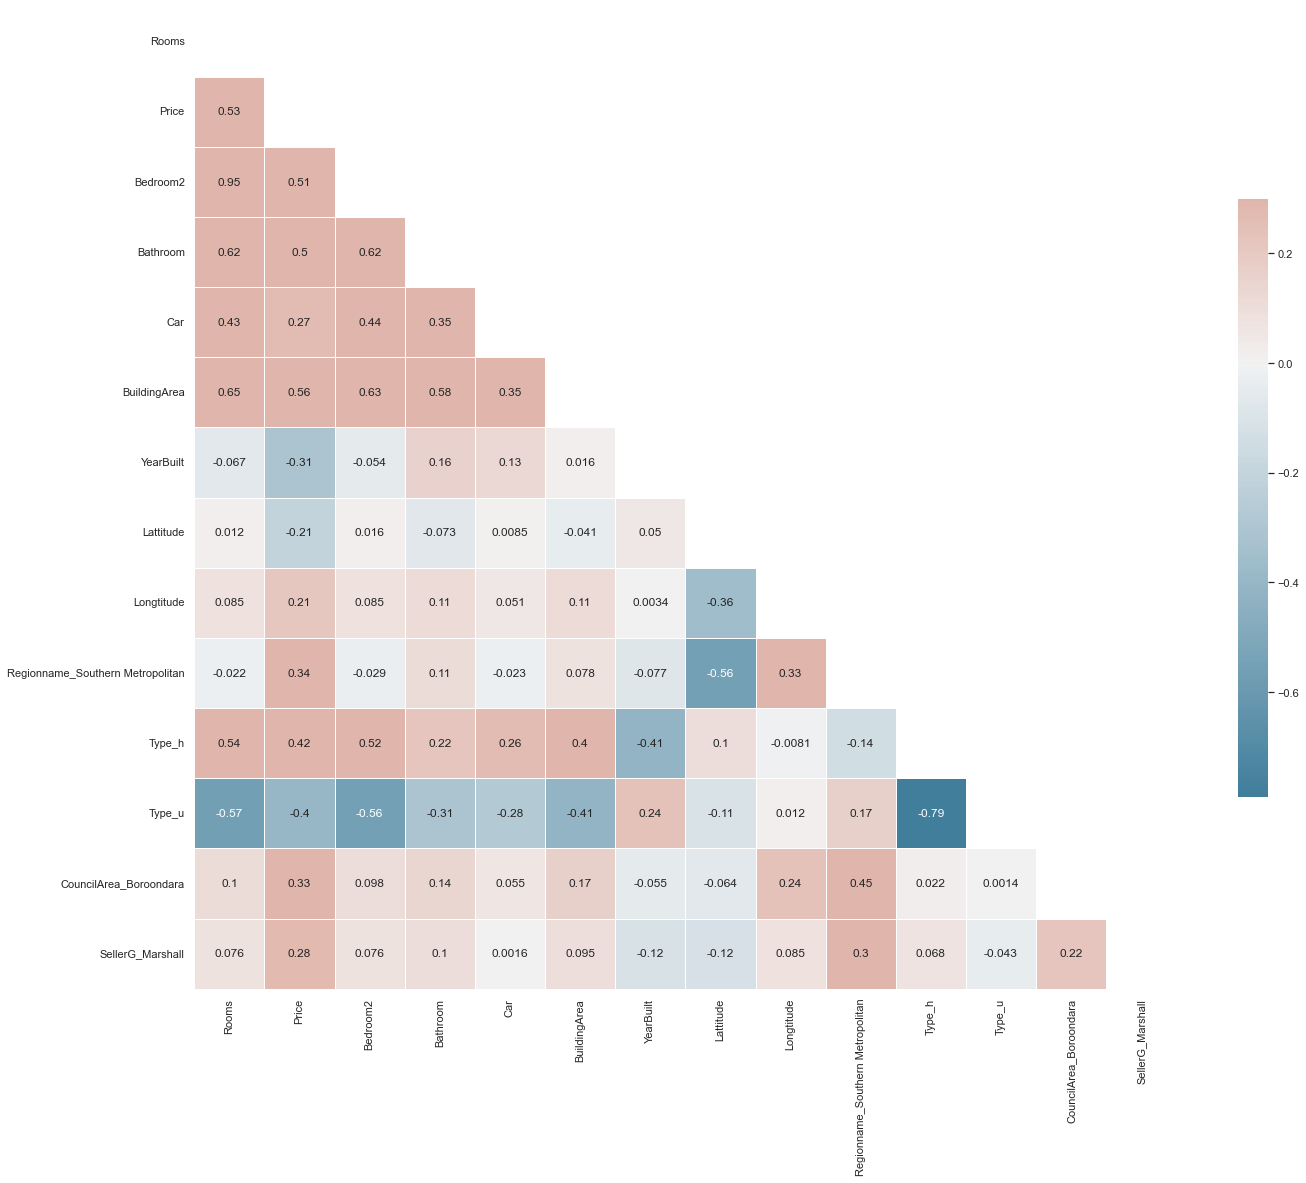

In [300]:
sns.set_theme(style="white")
corr = df[listaCorr_21].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [301]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# find the row of the house which has the highest price
maxpr=df.loc[df['Price'].idxmax()]

# define a function to draw a basemap easily  
def generateBaseMap(default_location=[-37.7996, 144.9984], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['Lattitude'], maxpr['Longtitude']],popup='Highest Price: $'+str(format(maxpr['Price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['Lattitude','Longtitude','count']].groupby(['Lattitude','Longtitude']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

# Multiple Linear Regression

In [302]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

In [303]:
listaCorr_22 = ['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Regionname_Southern Metropolitan', 'Type_h', 'Type_u', 'CouncilArea_Boroondara', 'SellerG_Marshall']

In [304]:
#regressão linear multipla 

#após varios testes com features diferentes, as variáveis em lista foram as que tiveram melhor  R^2
regr = linear_model.LinearRegression()
X_train = np.array(train_data[listaCorr_22])
y_train = np.array(train_data['Price'])
X_test = np.array(test_data[listaCorr_22])
y_test = np.array(test_data['Price'])
regr.fit(X_train,y_train)

LinearRegression()

In [305]:
print('Coefficients: ', regr.coef_)

Coefficients:  [  50337.40037202   -1315.34000287  220056.3356382    42100.37125668
    2390.66356605   -5411.43752336  308377.56858462   41391.60951169
 -143312.65266096  232837.895561    308305.7992035 ]


In [306]:
train_pred = regr.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, train_pred)
print(np.sqrt(mse_train))

429670.6453453082


In [307]:
test_pred = regr.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, test_pred)
print(np.sqrt(mse_test))

444752.91197625437


In [308]:
print(regr.score(X_train, y_train))

0.5998452155520138


Quanto maior o R² (resultado da função .score()), mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear

In [309]:
print(regr.score(X_test, y_test))

0.6093020897682742


# Polynomial Features

In [310]:
from sklearn.preprocessing import PolynomialFeatures

#após varios testes com features diferentes, estas são as que têm melhor  R^2
features=['Rooms','Bedroom2','Bathroom','Distance', 'YearBuilt','BuildingArea', 'Landsize','Regionname_Northern Metropolitan' ,'Regionname_Southern Metropolitan','Type_h','Type_u','SellerG_Marshall']
polyfeat = PolynomialFeatures(degree=2)
#X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[listaCorr_22])
X_testpoly = polyfeat.fit_transform(test_data[listaCorr_22])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

In [311]:
pred1 = poly.predict(X_testpoly)
mse_train = metrics.mean_squared_error(y_test, pred1)
print(np.sqrt(mse_train))

419475.43800893525


In [312]:
print(poly.score(X_testpoly, y_test))

0.6524505863515597


# RegressorGradientBoostingRegressor

In [313]:
X_train2 = np.array(train_data[listaCorr_22])
y_train2 = np.array(train_data['Price'])
X_test2 = np.array(test_data[listaCorr_22])
y_test2 = np.array(test_data['Price'])

In [314]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 75, max_depth = 5, min_samples_split = 4, 
          learning_rate = 0.08,loss = 'squared_error')

In [315]:
clf.fit(X_train2, y_train2)

GradientBoostingRegressor(learning_rate=0.08, max_depth=5, min_samples_split=4,
                          n_estimators=75)

In [316]:
clf.score(X_test2,y_test2)

0.6957796089522104

# RandomForestRegressor

In [317]:
clf2 = ensemble.RandomForestRegressor(n_estimators=80, criterion='squared_error', max_depth=25,
                                     min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.0,
                                     max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                     bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                                     warm_start=False, ccp_alpha=0.0, max_samples=None)

In [318]:
clf2.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=25, max_features=1.0, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=80)

In [319]:
clf2.score(X_test2,y_test2)

0.7126442226655865

In [320]:
listaPrever = [[]]
for n in range(11):
    var0 = 0
    listaPrever[0].append(var0)

In [321]:
#Room
listaPrever[0][0] = 2
#Bedroom2
listaPrever[0][1] = 2
#Bathroom
listaPrever[0][2] = 1
#'Car'
listaPrever[0][3] = 2
#BuildingArea
listaPrever[0][4] = 150
#YearBuilt
listaPrever[0][5] = 1985
#Regionname_Southern Metropolitan
listaPrever[0][6] = 0
#Type_h
listaPrever[0][7] = 1
#Type_u
listaPrever[0][8] = 0
#CouncilArea_Boroondara
listaPrever[0][9] = 0
#SellerG_Marshall
listaPrever[0][10] = 0




listaPrever = np.array(listaPrever)

print(listaPrever)

[[   2    2    1    2  150 1985    0    1    0    0    0]]


In [322]:

previsao = clf2.predict(listaPrever)
print(previsao)

[973186.74603175]


In [324]:
y_pred2 = clf2.predict(X_test2)

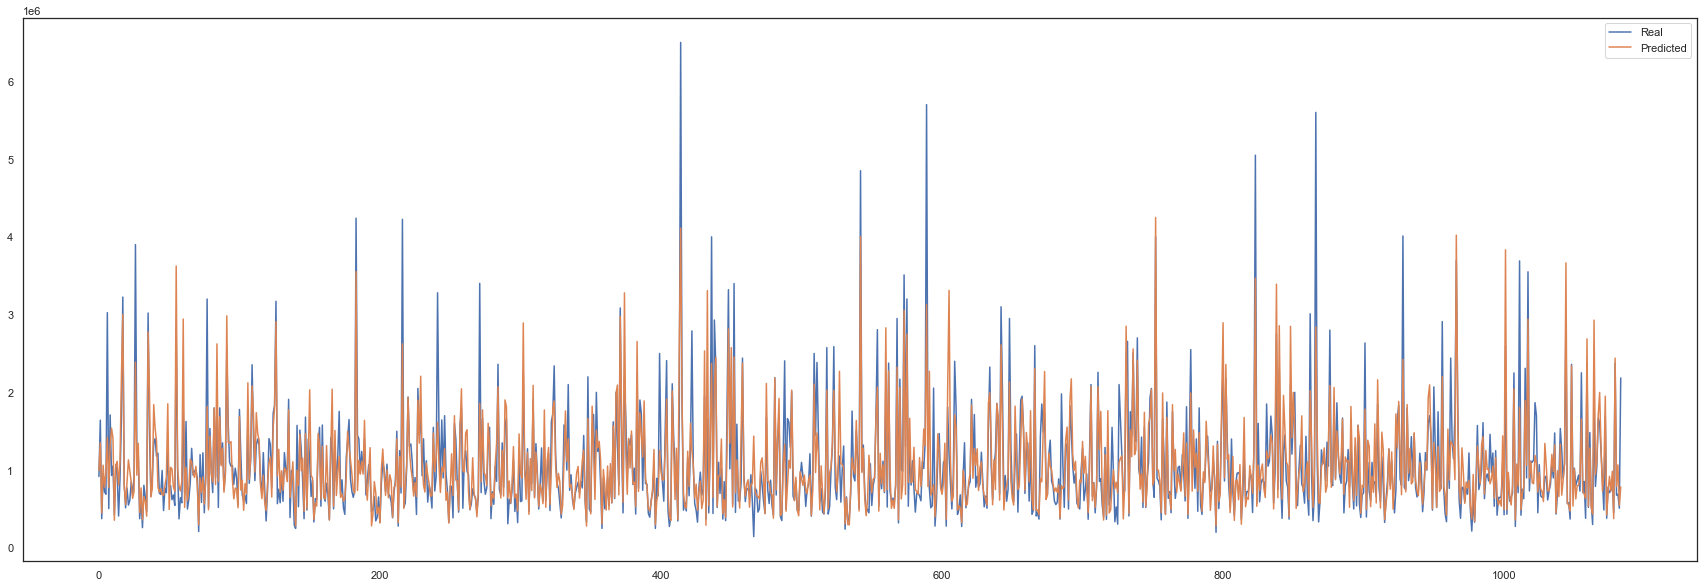

In [325]:
plt.figure(figsize=(30,10))

plt.plot(y_test2, label='Real')

plt.plot(y_pred2, label = 'Predicted')

plt.legend()

plt.show()